In [1]:
import pickle
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.axes._axes import _log
_log.setLevel("ERROR")

from parallel_betweenness import betweenness_centrality_parallel

%matplotlib inline

seed = 42
n_processes = 4

In [2]:
np.random.seed(seed)

with open("data/edges.pkl", "rb") as f:
    G = nx.Graph()
    G.add_edges_from(pickle.load(f))
G.remove_nodes_from(set(nx.nodes(G)) - max(nx.connected_components(G), key=len))
node_list = list(G.nodes())

print(f"nodes: {len(node_list)}")
print(f"edges: {len(G.edges())}")

d = {"nconst": node_list}
df_actor_info = pd.DataFrame(d)
df_actor_info["degree"] = df_actor_info["nconst"].apply(G.degree)
print(df_actor_info.shape)

betweenness = betweenness_centrality_parallel(G, processes=n_processes)
df_betweenness = pd.DataFrame(betweenness.items(), columns=["nconst", "betweenness"])
df_actor_info = df_actor_info.merge(df_betweenness, how="left")
print(df_actor_info.shape)

df_actor_info

nodes: 98
edges: 185
(98, 2)
(98, 3)


,nconst,degree,betweenness
0,nm0619309,18,0.092467
1,nm1134660,1,0.000000
2,nm1150184,5,0.000000
3,nm0304262,20,0.455358
4,nm0433887,6,0.002493
...,...,...,...
93,nm0474928,1,0.000000
94,nm0632560,1,0.000000
95,nm0471464,1,0.000000
96,nm1163202,1,0.000000


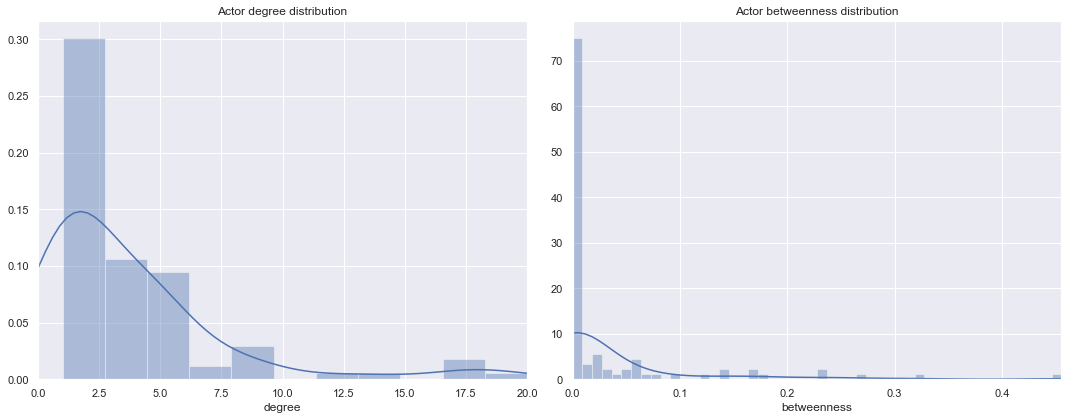

In [9]:
sns.set()
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.distplot(df_actor_info["degree"], ax=axs[0])
axs[0].set_xlim(0, df_actor_info["degree"].max())
axs[0].set_title("Actor degree distribution")
sns.distplot(df_actor_info["betweenness"], ax=axs[1])
axs[1].set_xlim(0, df_actor_info["betweenness"].max())
axs[1].set_title("Actor betweenness distribution")
plt.tight_layout()
plt.show()
